In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import numpy as np
from qiskit import QuantumCircuit, execute
from qiskit.transpiler import CouplingMap, PassManager
from qiskit.transpiler.passes import LookaheadSwap
import qiskit.circuit.library as qulib
import qiskit.quantum_info as qi

from qiskit_textbook.tools import array_to_latex
# qiskit_textbook.tools is not part of Qiskit. If not installed, comment out line above. 
# Or to install see: https://qiskit.org/textbook/ch-prerequisites/setting-the-environment.html

---
# 2. ADVANCED CIRCUITS

## Question 2.1

**How do you merge the lhs and rhs circuits to form the final circuit?**

<div align= "left">
    <p style="float: left;"><b> lhs:  </b></p> 
    <p><img src="..\questions\advanced_circuits_images\lhs.png" style="float: left;"/> </p> 
    <p style="float: left;"><b> rhs:  </b></p> 
    <p><img src="..\questions\advanced_circuits_images\rhs.png" style="float: left;"/> </p>
    <p style="float: left;"><b> final  :</b></p> 
    <p><img src="..\questions\advanced_circuits_images\merged.png" style="float: left;"/> </p>
</div>

**1)** `lhs.append(rhs)`

**2)** `lhs.combine(rhs)`

**3)** `lhs.compose(rhs)`

**4)**  `lhs+rhs`

**5)**  None of the above

### Solution to Q2.1

From Qiskit's documentation, we know that [`QuantumCircuit.compose`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.compose.html#qiskit.circuit.QuantumCircuit.compose) performs this task, but let's construct the two circuits and do it ourselves:

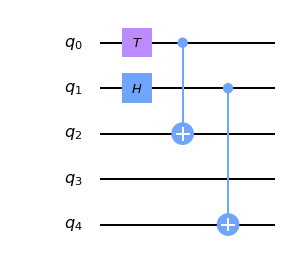

In [2]:
qc_adv1_1 = QuantumCircuit(5)
qc_adv1_1.t(0)
qc_adv1_1.h(1)
qc_adv1_1.cx(0,2)
qc_adv1_1.cx(1,4)
qc_adv1_1.draw('mpl')

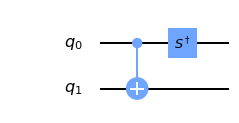

In [3]:
qc_adv1_2 = QuantumCircuit(2)
qc_adv1_2.cx(0,1)
qc_adv1_2.sdg(0)
qc_adv1_2.draw('mpl')

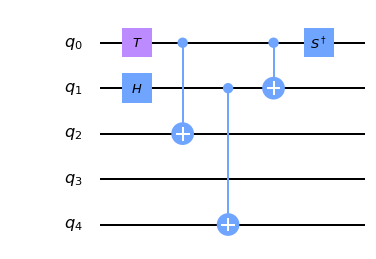

In [4]:
qc_adv1_3 = qc_adv1_1.compose(qc_adv1_2)
qc_adv1_3.draw('mpl')

### Answer for Q2.1: 

**3)** `lhs.compose(rhs)`

---
## Question 2.2

**What's the depth of `QuantumVolume(num_qubits=5, depth=5)` circuit after decomposition into basis gates `[u3,cx]`?**

**1)** 5

**2)** 10

**3)** 25

**4)** 35

**5)** None of the above

### Solution to Q2.2:

Using [`QuantumCircuit.decompose`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.decompose.html?highlight=quantumcircuit%20decompose) we can do a shallow decomposition of the [`QuantumVolume`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.QuantumVolume.html?highlight=quantumvolume#qiskit.circuit.library.QuantumVolume) circuit and see the layer of `su4` elements that compose the random circuit

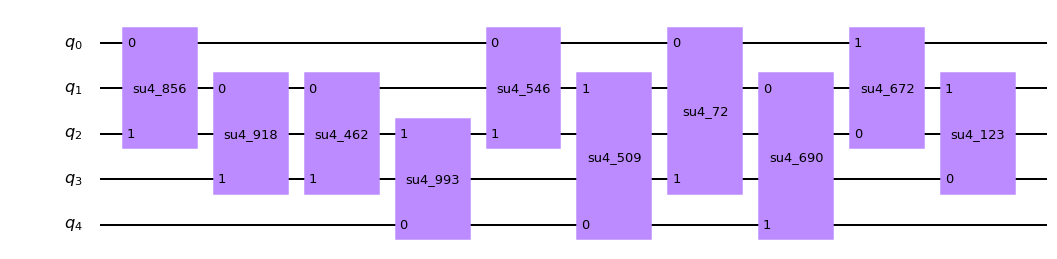

In [16]:
qc_adv2_1 = qulib.QuantumVolume(num_qubits=5, depth=5)
qc_adv2_2 = qc_adv2_1.decompose()
qc_adv2_2.draw('mpl', fold = 100)

If we now decompose that circuit again, we can see the underlying layer of `u3` and `cx` gates that compose the `su4` blocks. We can then print the depth of that circuit.

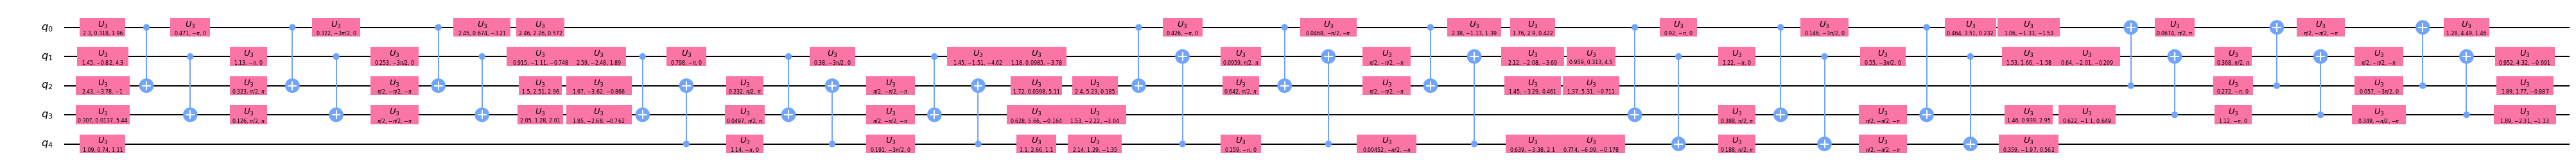

In [17]:
qc_adv2_2 = qc_adv2_2.decompose()
qc_adv2_2.draw('mpl', fold = 100)

In [18]:
print(qc_adv2_2.depth())

35


### Answer for Q2.2: 

**4)** 35

---
## Question 2.3

**Which of the following gates/circuits are not currently available in the Qiskit circuit library?**

**1)** `HGate`

**2)** `NAND`

**3)** `QFT`

**4)** `QuantumVolume`

**5)** None of the above

### Solution for Q2.3:

We can check in Qiskit's [circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html#circuit-library-qiskit-circuit-library) that there is no gate available for a NAND operation. This is perhaps because a standard NAND gate corresponds to a non-reversible operation.

### Answer for Q2.3: 

2) `NAND`

---
## Question 2.4

**Which one of the following Operators is different from the rest?**

**1)** `Operator(Pauli(label='XZ'))`

**2)** `Operator(Pauli(label='X')).tensor(Operator(Pauli(label='Z')))`

**3)**  `qc = QuantumCircuit(2)
  qc.x(0)
  qc.z(1)
  Operator(qc)`

**4)**  `Operator([[0, 0, 1, 0], [0, 0, 0, -1], [1, 0, 0, 0], [0, -1, 0, 0]])`

**5)** None of the above

### Solution for Q2.4:

From Qiskit's documentation on [Pauli operators](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Pauli.html), we can see that the "Order of pauli label is q_{n-1} … q_0", therefore **option 1** above applies a Pauli Z gate to qubit `q0` and a Pauli X gate to qubit `q1`. 

Similarly, **option 2** tensors a qubit to which a Z gate is applied with a second qubit to which an X gate is applied; this results in the same operator as **option 1**. 

On the other hand, the circuit generated in **option 3** applies a Z gate to `q1` and an X gate to `q0`, making it different from **options 1** and **2**. 

To check if **option 4** is the same as **1** and **2**, we can actually evaluate all four options and see which one differs from the others:

In [19]:
U_adv4_1 = qi.Operator(qi.Pauli(label='XZ'))
array_to_latex(U_adv4_1.data) # If array_to_latex not installed, comment out and use print() command below
#print(U_adv4_1.data)

<IPython.core.display.Math object>

In [20]:
U_adv4_2 = qi.Operator(qi.Pauli(label='X')).tensor(qi.Operator(qi.Pauli(label='Z')))
array_to_latex(U_adv4_2.data) # If array_to_latex not installed, comment out and use print() command below
#print(U_adv4_2.data)

<IPython.core.display.Math object>

In [21]:
qc_adv4_3 = QuantumCircuit(2)
qc_adv4_3.x(0)
qc_adv4_3.z(1)
U_adv4_3 = qi.Operator(qc_adv4_3)
array_to_latex(U_adv4_3.data) # If array_to_latex not installed, comment out and use print() command below
#print(U_adv4_3.data)

<IPython.core.display.Math object>

In [22]:
U_adv4_4 = qi.Operator([[0, 0, 1, 0], [0, 0, 0, -1], [1, 0, 0, 0], [0, -1, 0, 0]])
array_to_latex(U_adv4_4.data) # If array_to_latex not installed, comment out and use print() command below
#print(U_adv4_4.data)

<IPython.core.display.Math object>

### Answer for Q2.4: 

**3)**  `qc = QuantumCircuit(2)
  qc.x(0)
  qc.z(1)
  Operator(qc)`

## Question 2.5

**How many gates are in the quantum circuit that results from transpiling the following quantum circuit using only the pass LookaheadSwap? Assume the following coupling map: [[0, 1], [1, 2], [2, 3], [3, 4]]**

<img src="..\questions\advanced_circuits_images\tpl_circuit.png" style="float: left;"/> </p> 

### Solution for Q2.5:

First let's generate this circuit:


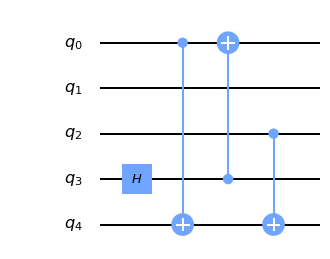

In [12]:
qc_adv5_1 = QuantumCircuit(5)
qc_adv5_1.h(3)
qc_adv5_1.cx(0,4)
qc_adv5_1.cx(3,0)
qc_adv5_1.cx(2,4)
qc_adv5_1.draw('mpl')

Now, we can use the [`LookaheadSwap`](https://qiskit.org/documentation/stubs/qiskit.transpiler.passes.LookaheadSwap.html?highlight=lookaheadswap) function with the the coupling map given in this question, pass it to the [`PassManager`](https://qiskit.org/documentation/stubs/qiskit.transpiler.PassManager.html?highlight=passmanager) and run it to generate the desired circuit:

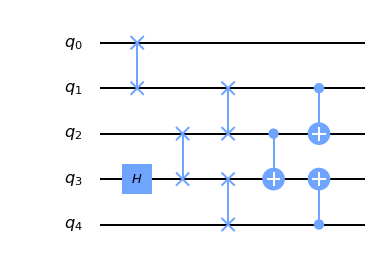

In [13]:
cmap_adv5_2 = CouplingMap(couplinglist = [[0, 1], [1, 2], [2, 3], [3, 4]])
ls = LookaheadSwap(coupling_map = cmap_adv5_2)
pass_manager = PassManager(ls)
qc_adv5_2 = pass_manager.run(qc_adv5_1)
qc_adv5_2.draw('mpl')

In [14]:
qc_adv5_2.size()

8

### Answer for Q2.5: 

**2)** 8

This last question (Q2.5) is a bit tricky because it could be interpreted in slightly different way. Transpiling of the circuit above can also be done using the `transpile` function from the `qiskit.compiler` module. This function also accepts a `routing_method` argument that can take the value `lookahead`, and a `coupling_map` argument to which we can assign the one given in this problem. By closely inspecting the source code of the `transpile` function, it can be seen that the `routing_method` and `coupling_map` parameters are actually parsed down to the `PassManager` guaranteeing that the `LookaheadSwap` function with the (coupling map as an argument) is used as part of the transpiling optimization.

The problem with using the `transpile` function is that it does more than just optimizing using these two arguments. `transpile` uses something known as [Preset Pass Managers](https://qiskit.org/documentation/apidoc/transpiler_preset.html), which are a more "generic" way to optimize the transpiled circuit. The issue here is that, even when using the Preset Pass Manager `level_0_pass_manager` (which is not supposed to do any additional optimization), the function performs many other passes, including the `CXDirection` pass, which (from Qiskit's documentation): "Rearrange[s] the direction of the cx nodes to match the directed coupling map."

Let's transpile the circuit using this method and see what we get:

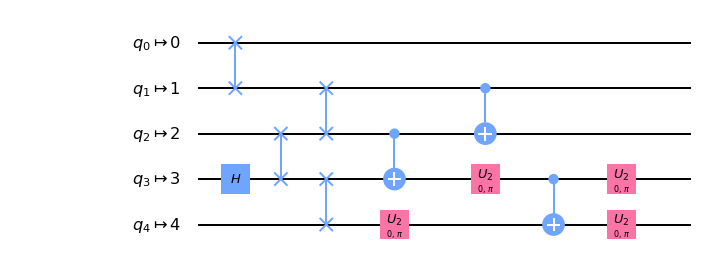

In [15]:
from qiskit.compiler import transpile
qc_adv5_trans = transpile(qc_adv5_1, optimization_level = 0, coupling_map = cmap_adv5_2, routing_method = 'lookahead')
qc_adv5_trans.draw('mpl')

It can be seen that the resulting circuit is very similar to the one we obtained before, with the only difference being that the CNOT between qubits 4 and 3 has been decomposed into a series of U2 rotation gates and a CNOT between qubits 3 and 4. Since the quesiton specifically asks for gates "using only the pass LookaheadSwap", this approach is not correct.